In [9]:
from os import listdir
from os.path import isfile, join

import json
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context='talk', style='white',
        font='sans-serif', font_scale=1, color_codes=True, rc=None)

%config InlineBackend.figure_format = 'retina'

In [10]:
# Define the relevant paths after cloning the repo
train_data_path = "data/training/"
eval_data_path = "data/evaluation/"

# Get all the filenames
train_tasks = [f for f in listdir(train_data_path) if isfile(join(train_data_path, f))]
eval_tasks = [f for f in listdir(eval_data_path) if isfile(join(eval_data_path, f))]

print("# Training Tasks: {}".format(len(train_tasks)))
print("# Evaluation Tasks: {}".format(len(eval_tasks)))

# Training Tasks: 400
# Evaluation Tasks: 400


In [11]:
def load_task(config_fname):
    """ Load in a task JSON file and return as a dictionary """
    json_config = json.loads(open(config_fname, 'r').read())
    dict_config = DotDic(json_config)

    # Make inner dictionaries indexable like a class
    for key, value in dict_config.items():
        if isinstance(value, dict):
            dict_config[key] = DotDic(value)
    return dict_config


class DotDic(dict):
    """ Helper to load in parameters from json & easily call them """
    __getattr__ = dict.get
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__

    def __deepcopy__(self, memo=None):
        return DotDic(copy.deepcopy(dict(self), memo=memo))

In [12]:

def plot_arc_task(task):
    """ Plot an example of a task from the ARC benchmark"""
    num_train_ex = len(task.train)
    fig, axs = plt.subplots(2, num_train_ex+1, figsize=(10, 10))
    for i in range(num_train_ex):
        axs[0, i].imshow(task.train[i]["input"], vmin=0, vmax=10)
        axs[1, i].imshow(task.train[i]["output"], vmin=0, vmax=10)
        axs[0, i].axis("off")
        axs[1, i].axis("off")
        axs[0, i].set_title("Train {}: Input".format(i+1))
        axs[1, i].set_title("Train {}: Output".format(i+1))
        
    
    axs[0, num_train_ex].imshow(task.test[0]["input"], vmin=0, vmax=10)
    axs[1, num_train_ex].imshow(task.test[0]["output"], vmin=0, vmax=10)
    axs[0, num_train_ex].axis("off")
    axs[1, num_train_ex].axis("off")
    axs[0, num_train_ex].set_title("Test: Input".format(i+1))
    axs[1, num_train_ex].set_title("Test: Output".format(i+1))
    fig.tight_layout()

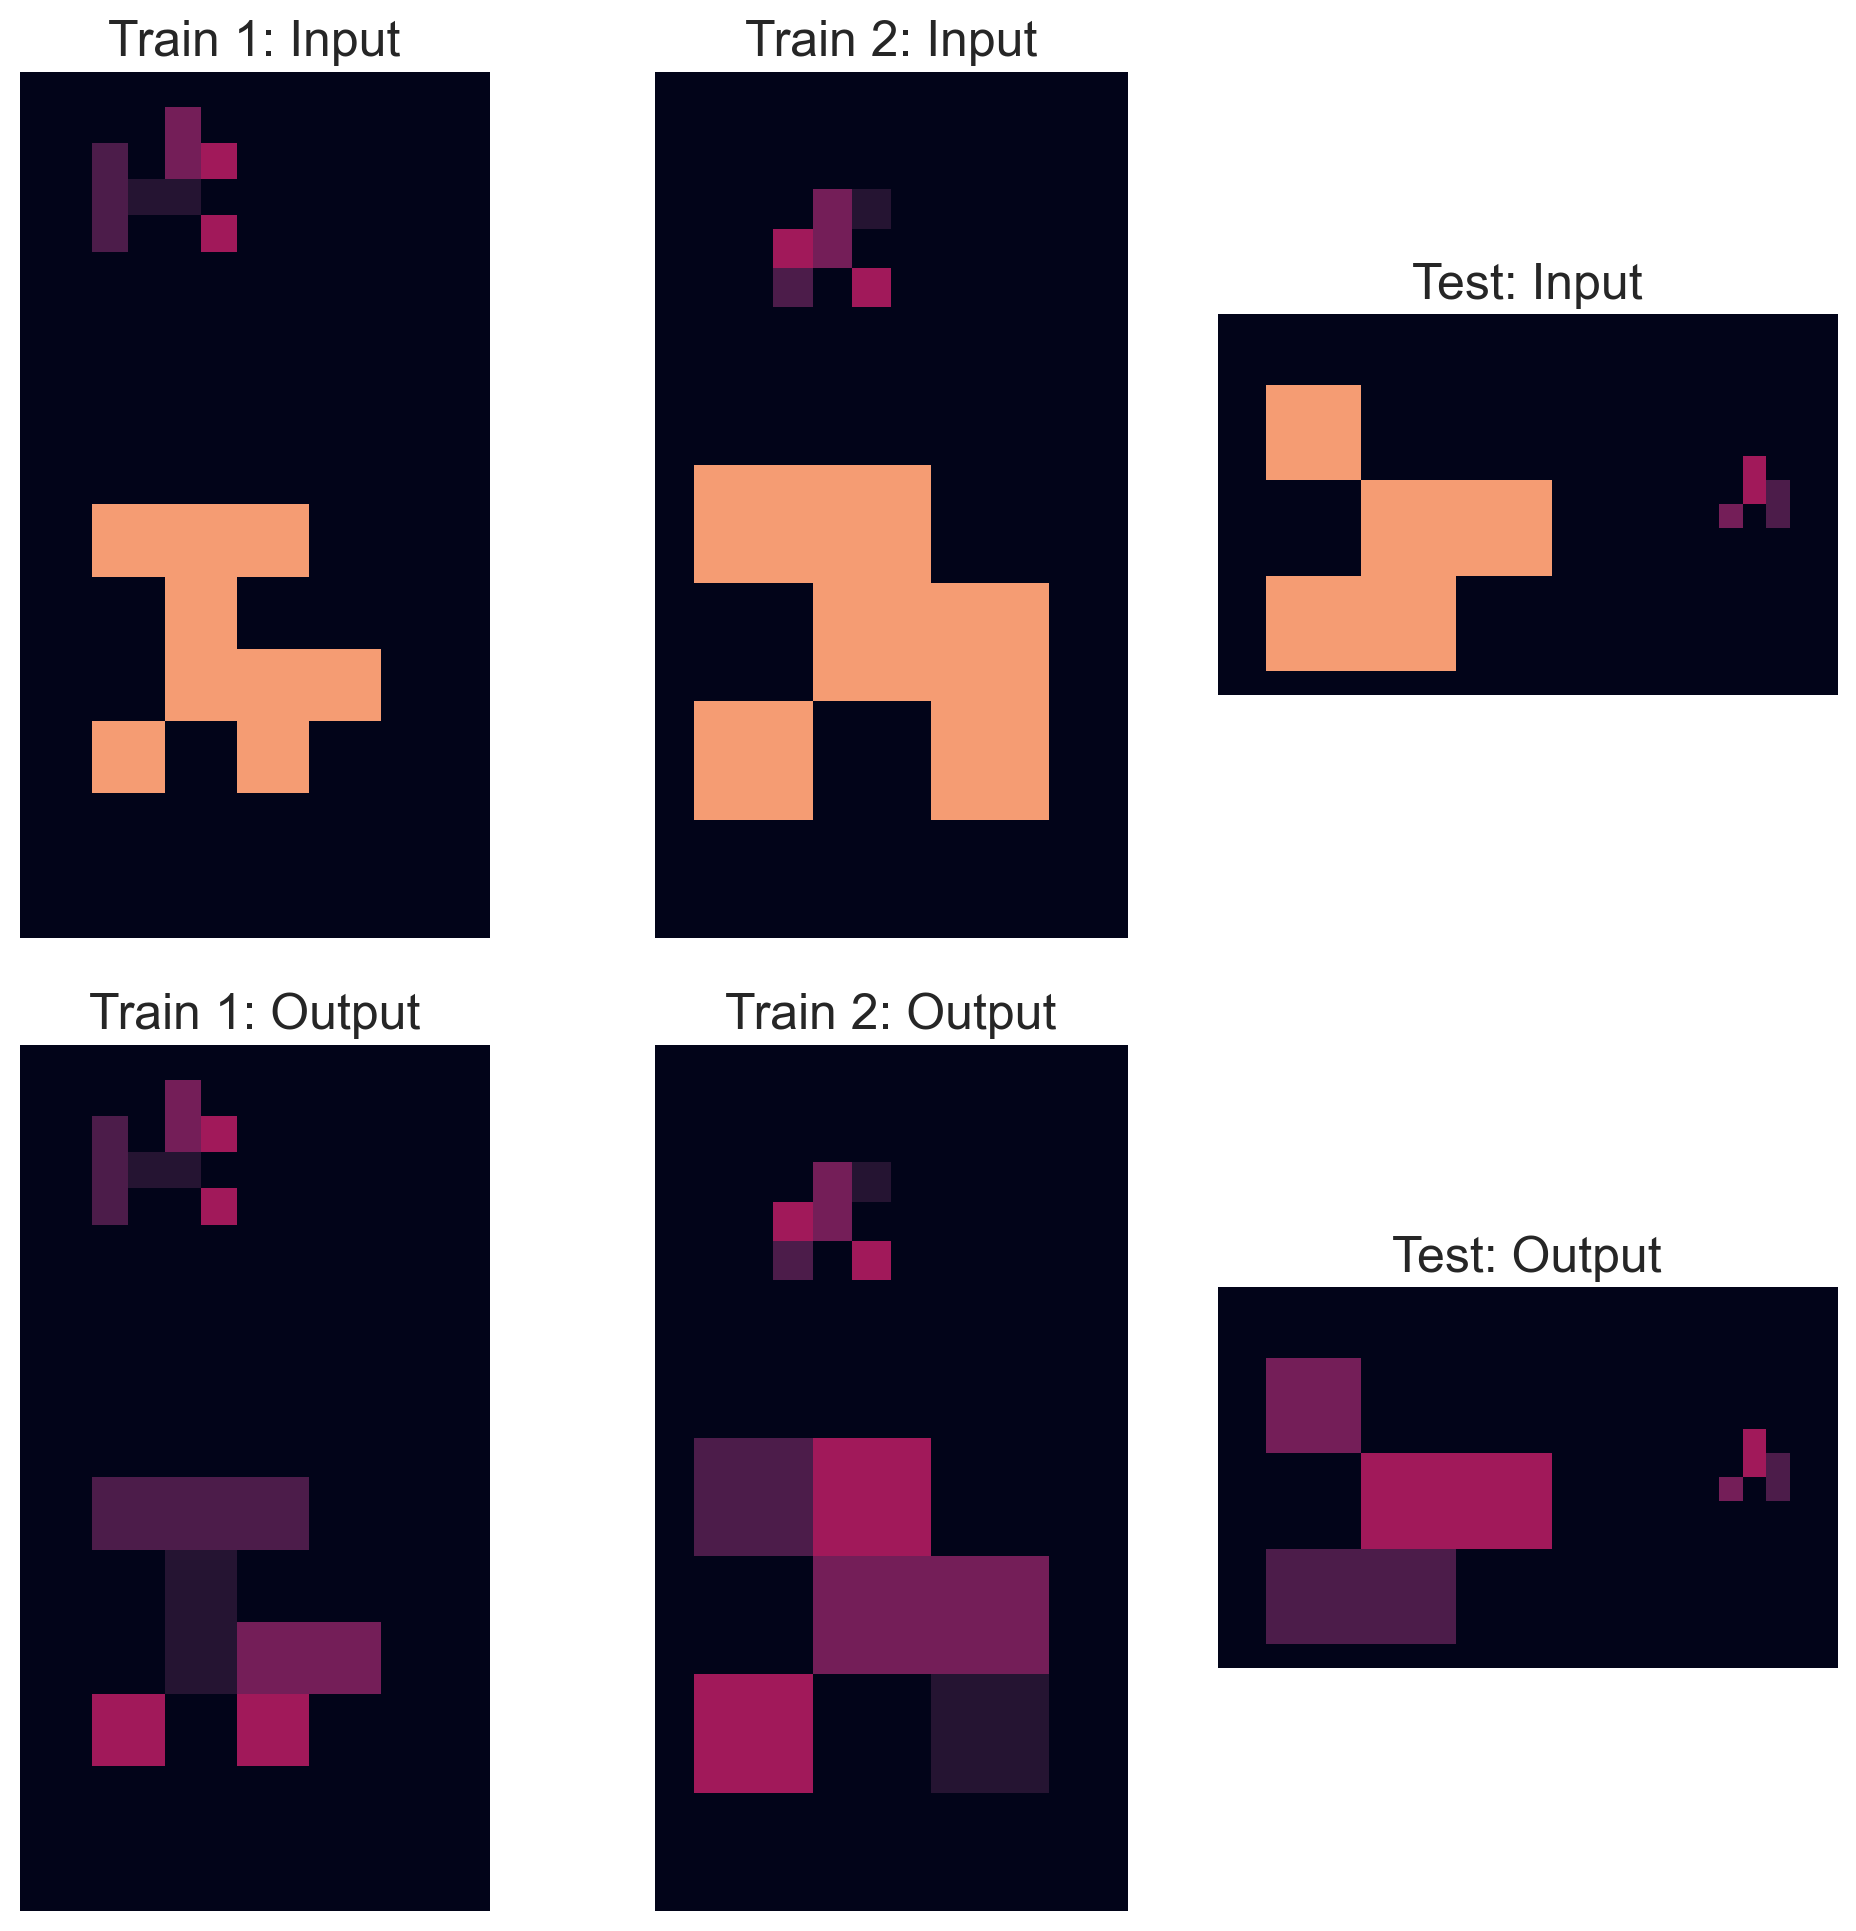

In [13]:

# for i in range(3):
#     random_task_id = np.random.choice(range(len(train_tasks)))
    # example_task = load_task(train_data_path + train_tasks[random_task_id])
example_task = load_task("data/evaluation/103eff5b.json")
plot_arc_task(example_task)

In [14]:

train_task_examples = []
eval_task_examples = []
for i in range(400):
    train_task = load_task(train_data_path + train_tasks[i])
    train_task_examples.append(len(train_task["train"]))

    eval_task = load_task(eval_data_path + eval_tasks[i])
    eval_task_examples.append(len(eval_task["train"]))